In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [2]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method) 
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

Data shape: (45211, 9)


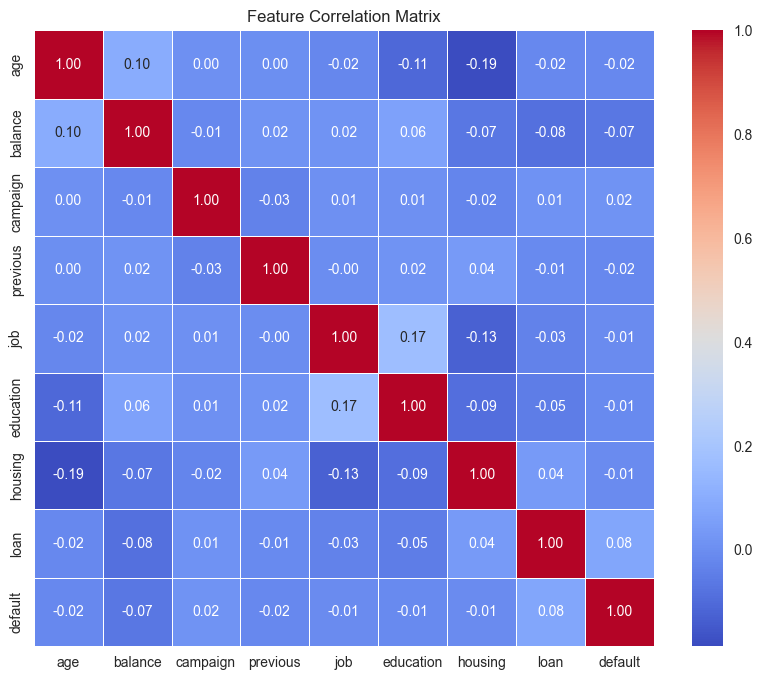

In [3]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.
    
    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';') # TODO: Load CSV with correct separator
    
    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'poutcome', 'y']
    
    # TODO: Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])
    
    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
               'housing', 'loan', 'default']
    X = df[features] # TODO: Select features
    
    # TODO: Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

features_for_corr = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
                     'housing', 'loan', 'default']

# Calculate the correlation matrix
corr_matrix = data[features_for_corr].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [4]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        centroids = X[indices]
        return centroids

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            # Calculate euclidean distance from all points to the k-th centroid
            distances[:, k] = np.linalg.norm(X - self.centroids[k], axis=1)
        
        # Find the index (cluster) of the minimum distance for each point
        labels = np.argmin(distances, axis=1)
        return labels

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        n_features = X.shape[1]
        new_centroids = np.zeros((self.n_clusters, n_features))
        
        for k in range(self.n_clusters):
            # Get all points assigned to this cluster
            cluster_points = X[labels == k]
            
            if len(cluster_points) > 0:
                # Calculate the mean of these points
                new_centroids[k] = np.mean(cluster_points, axis=0)
            else:
                # Handle empty cluster: keep the old centroid
                new_centroids[k] = self.centroids[k]
                
        return new_centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        self.centroids = self._initialize_centroids(X)
        
        for i in range(self.max_iters):
            old_centroids = self.centroids
            
            # 1. Assign clusters
            self.labels = self._assign_clusters(X)
            
            # 2. Update centroids
            self.centroids = self._update_centroids(X, self.labels)
            
            # 3. Check for convergence
            if np.allclose(old_centroids, self.centroids):
                break
                
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

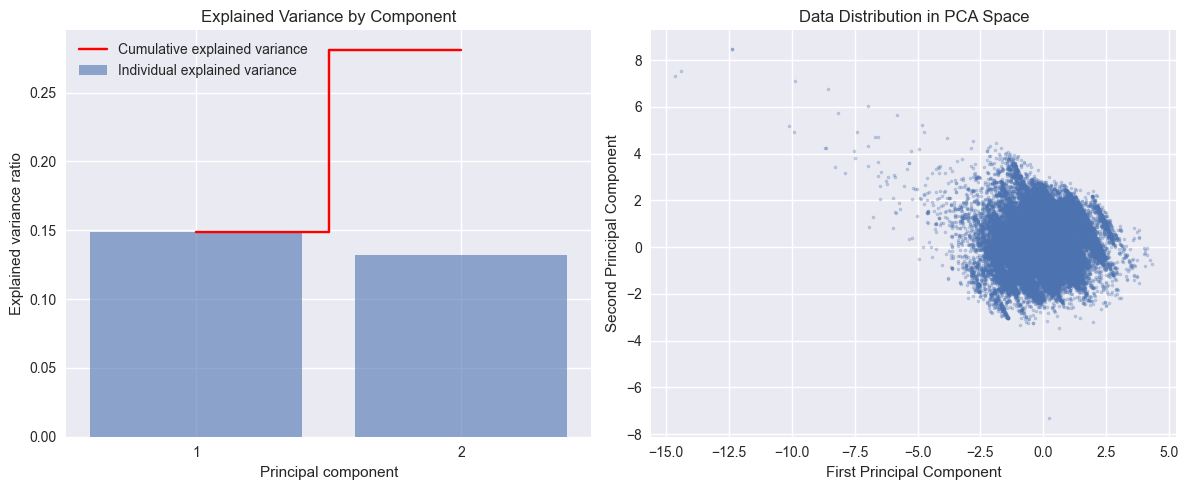

Shape after PCA: (45211, 2)


In [5]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.
    
    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # TODO: Create visualization
    plt.figure(figsize=(12, 5))
    
    # Plot explained variance
    plt.subplot(1, 2, 1)
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    components = range(1, n_components + 1)
    
    plt.bar(components, explained_variance, alpha=0.6, align='center',
            label='Individual explained variance')
    plt.step(components, cumulative_variance, where='mid',
             label='Cumulative explained variance', color='red')
    
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component')
    plt.title('Explained Variance by Component')
    plt.xticks(ticks=components)
    plt.legend(loc='best')
    plt.grid(True)

    # Plot data in 2D
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3, s=5)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('Data Distribution in PCA Space')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)


## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

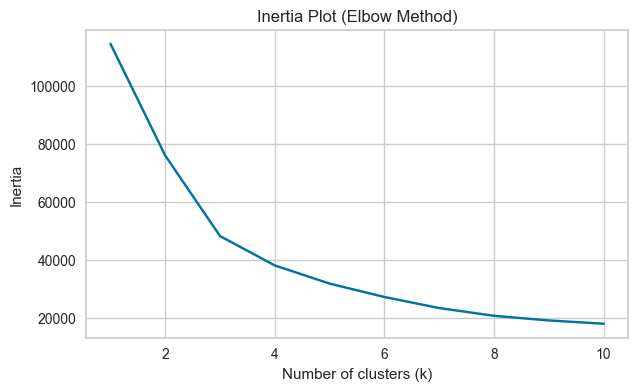

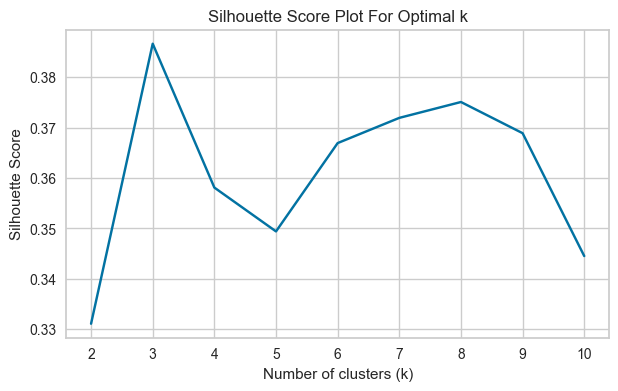

C:\Users\mriga\AppData\Local\Temp\ipykernel_33596\1545164936.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_labels, y=counts, palette='viridis')
C:\Users\mriga\AppData\Local\Temp\ipykernel_33596\1545164936.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Silhouette Value', data=silhouette_df, palette='viridis')


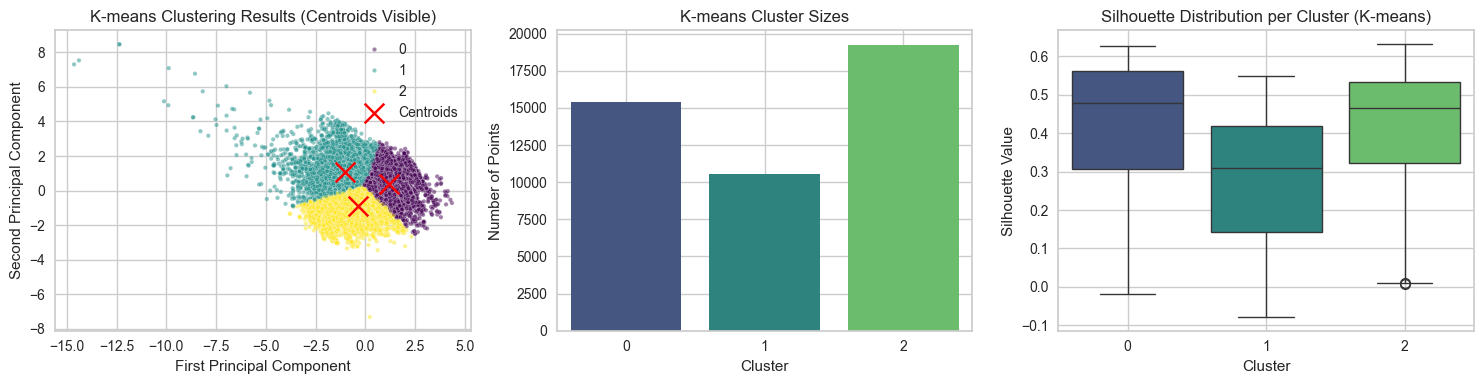


Clustering Evaluation:
InertIA: 48179.64
Silhouette Score: 0.39


In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score # Added silhouette_samples import
from yellowbrick.cluster import SilhouetteVisualizer # For the silhouette score plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).
    
    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    inertia = 0
    # Calculate distances between points and their assigned centroids
    for k in range(len(centroids)):
        # Get points belonging to this cluster
        cluster_points = X[labels == k]
        if len(cluster_points) > 0:
            # Calculate squared distance to centroid and sum them up
            inertia += np.sum((cluster_points - centroids[k])**2)
            
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.
    
    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    inertias = []
    K = range(1, max_k + 1)
    
    # Calculate inertia for different k values
    for k in K:
        kmeans_temp = KMeansClustering(n_clusters=k, random_state=42)
        kmeans_temp.fit(X)
        inertia = calculate_inertia(X, kmeans_temp.labels, kmeans_temp.centroids)
        inertias.append(inertia)
    
    # Create elbow plot
    plt.figure(figsize=(7, 4)) # Reduced size
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Inertia Plot (Elbow Method)')
    plt.grid(True)
    plt.show()
    
    return inertias

def plot_silhouette_scores(X, max_k=10):
    """Plot silhouette scores for different k values."""
    silhouette_scores = []
    # Note: Silhouette score is only defined for k >= 2
    K = range(2, max_k + 1)
    
    for k in K:
        kmeans_temp = KMeansClustering(n_clusters=k, random_state=42)
        kmeans_temp.fit(X)
        score = silhouette_score(X, kmeans_temp.labels)
        silhouette_scores.append(score)
    
    # Create silhouette plot
    plt.figure(figsize=(7, 4)) # Reduced size
    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Plot For Optimal k')
    plt.grid(True)
    plt.show()
    
    return silhouette_scores

# --- Execution Code ---

# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)
silhouette_scores = plot_silhouette_scores(X_pca)

# Apply final clustering
# NOTE: Update n_clusters based on your plots. 3 is the likely answer.
n_clusters = 3
kmeans = KMeansClustering(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_pca)

#Visualize final results

plt.figure(figsize=(15, 4)) # Reduced size (was 18, 5)

# Plot 1: K-means Clustering Results with Centroids
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels, palette='viridis', s=10, alpha=0.5, legend='full')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
            c='red', marker='x', s=200, label='Centroids')
plt.title('K-means Clustering Results (Centroids Visible)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid(True)

# Plot 2: K-means Cluster Sizes (Bar Plot)
plt.subplot(1, 3, 2)
cluster_labels, counts = np.unique(kmeans.labels, return_counts=True)
sns.barplot(x=cluster_labels, y=counts, palette='viridis')
plt.title('K-means Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.grid(True)

# Plot 3: Silhouette Distribution per Cluster (Box Plot)
plt.subplot(1, 3, 3)
silhouette_vals = silhouette_samples(X_pca, kmeans.labels) # This line needed the import
silhouette_df = pd.DataFrame({
    'Silhouette Value': silhouette_vals,
    'Cluster': kmeans.labels
})
sns.boxplot(x='Cluster', y='Silhouette Value', data=silhouette_df, palette='viridis')
plt.title('Silhouette Distribution per Cluster (K-means)')
plt.grid(True)

plt.tight_layout()
plt.show() # Call show() AFTER all subplots are defined

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"InertIA: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

Running Recursive Bisecting K-means...
Bisecting K-means algorithm complete.
Overall Silhouette Score (Bisecting K-means): 0.3379


C:\Users\mriga\AppData\Local\Temp\ipykernel_33596\927439965.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_ids, y=counts, palette='viridis')
C:\Users\mriga\AppData\Local\Temp\ipykernel_33596\927439965.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Silhouette Value', data=silhouette_df, palette='viridis')


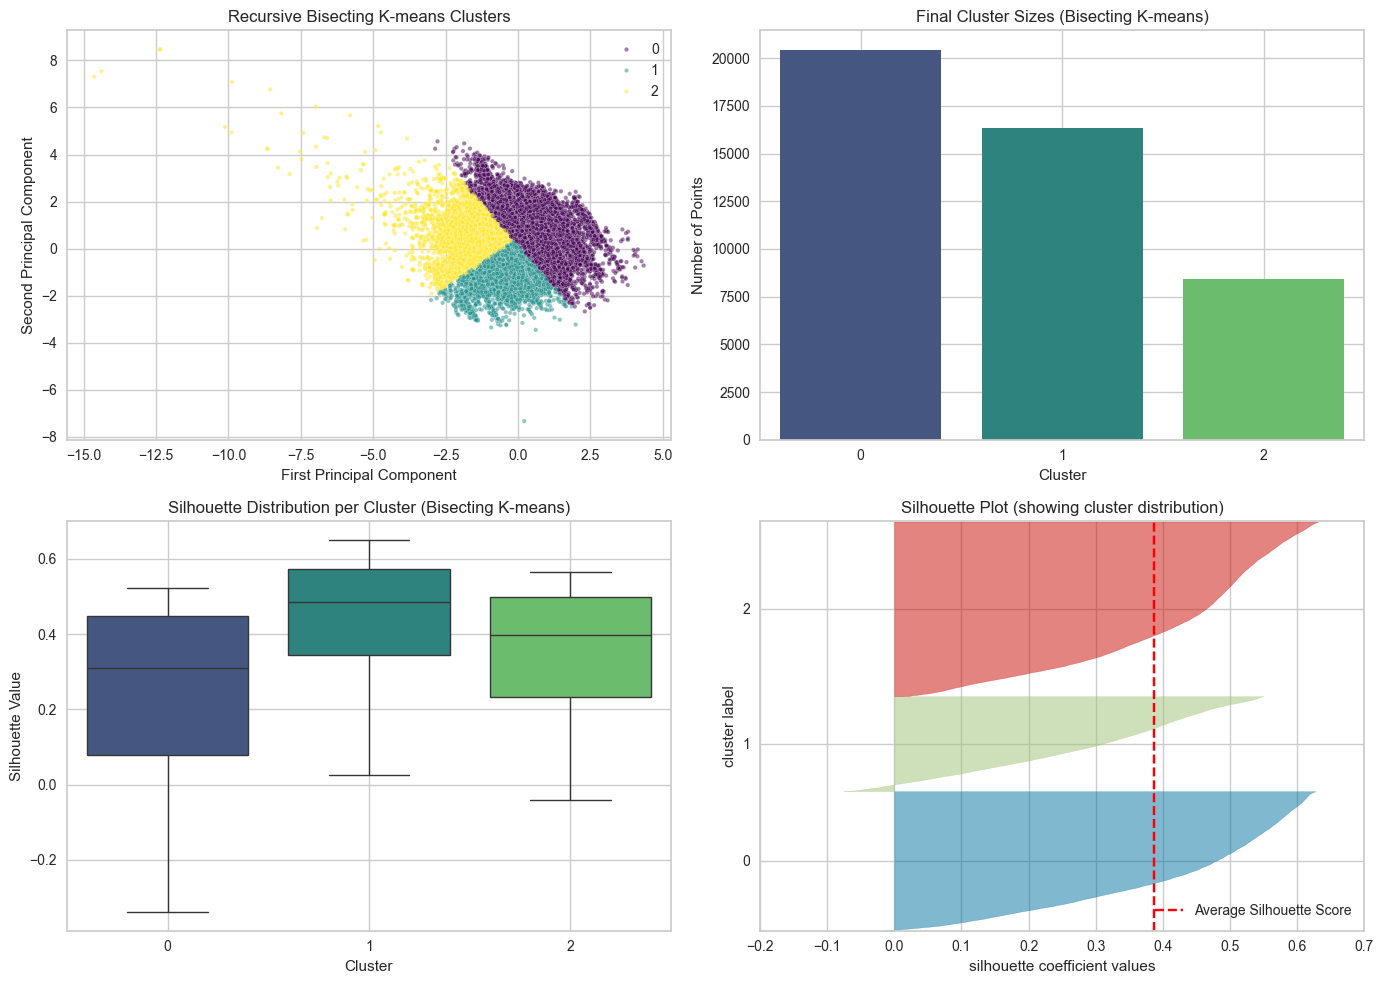


--- Analysis Data for Report ---
Cluster Sizes (Bisecting K-means):
Cluster 0: 20434 points
Cluster 1: 16348 points
Cluster 2: 8429 points


In [7]:
from sklearn.cluster import KMeans # Needed for the binary split
from sklearn.metrics import silhouette_score, silhouette_samples # For evaluation
from yellowbrick.cluster import SilhouetteVisualizer # For a specific plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        n_samples, n_features = X.shape
        
        # Start with all points in cluster 0
        labels = np.zeros(n_samples, dtype=int)
        
        # Store initial centroid for cluster 0
        self.centers_[0] = X.mean(axis=0)
        
        # Keep track of the next new label to assign
        current_max_label = 0
        
        # Loop until we have the desired number of clusters
        while (current_max_label + 1) < self.n_clusters:
            
            # 1. Select the largest cluster to split
            cluster_ids, counts = np.unique(labels, return_counts=True)
            largest_cluster_id = cluster_ids[np.argmax(counts)]
            
            # 2. Get the data for that cluster
            cluster_mask = (labels == largest_cluster_id)
            X_cluster = X[cluster_mask]
            
            # Edge case: if cluster is too small, skip
            if X_cluster.shape[0] < 2:
                continue
                
            # 3. Run binary KMeans on this subset
            # Using n_init=10 to avoid bad initializations, as recommended
            kmeans_binary = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            kmeans_binary.fit(X_cluster)
            
            # Get the new split labels (will be 0 and 1)
            split_labels = kmeans_binary.labels_
            
            # 4. Assign new, globally unique labels
            new_label_1 = largest_cluster_id # Keep the old label for one split
            new_label_2 = current_max_label + 1 # Create a new label for the other
            
            # 5. Update the main labels array
            # We use a temp array to map 0/1 to new_label_1/new_label_2
            new_labels_for_split = np.where(split_labels == 0, new_label_1, new_label_2)
            labels[cluster_mask] = new_labels_for_split
            
            # 6. Record metadata (optional but good practice)
            self.split_tree[largest_cluster_id] = (new_label_1, new_label_2)
            self.centers_[new_label_1] = kmeans_binary.cluster_centers_[0]
            self.centers_[new_label_2] = kmeans_binary.cluster_centers_[1]
            
            # Increment the max label counter
            current_max_label += 1
            
        self.labels_ = labels
        return self.labels_

# --- End of Class Definition ---

# --- Start of Execution Code ---

print("Running Recursive Bisecting K-means...")

# --- 1. Run the Bisecting K-means algorithm ---
# We'll use n_clusters=3 to match the K-means analysis and the PDF plots
bisect_kmeans = BisectingKMeans(n_clusters=3, random_state=42)
bisect_labels = bisect_kmeans.fit_predict(X_pca)

print("Bisecting K-means algorithm complete.")

# --- 2. Calculate and print the overall Silhouette Score ---
bisect_silhouette = silhouette_score(X_pca, bisect_labels)
print(f"Overall Silhouette Score (Bisecting K-means): {bisect_silhouette:.4f}")

# --- 3. Create visualizations similar to the PDF ---
plt.figure(figsize=(14, 10))

# Plot 1: Scatter plot of clusters [Matches PDF page 4]
plt.subplot(2, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=bisect_labels, palette='viridis', s=10, alpha=0.5, legend='full')
plt.title('Recursive Bisecting K-means Clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)

# Plot 2: Final Cluster Sizes [Matches PDF page 4]
plt.subplot(2, 2, 2)
cluster_ids, counts = np.unique(bisect_labels, return_counts=True)
sns.barplot(x=cluster_ids, y=counts, palette='viridis')
plt.title('Final Cluster Sizes (Bisecting K-means)')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.grid(True)

# Plot 3: Silhouette Distribution per Cluster [Matches PDF page 4]
# We need to calculate silhouette samples for each point
silhouette_vals = silhouette_samples(X_pca, bisect_labels)

# Create a DataFrame for easy plotting with Seaborn
silhouette_df = pd.DataFrame({
    'Silhouette Value': silhouette_vals,
    'Cluster': bisect_labels
})

plt.subplot(2, 2, 3)
sns.boxplot(x='Cluster', y='Silhouette Value', data=silhouette_df, palette='viridis')
plt.title('Silhouette Distribution per Cluster (Bisecting K-means)')
plt.grid(True)

# Plot 4: Silhouette Plot (for overall analysis)
ax = plt.subplot(2, 2, 4)
# We use a standard KMeans model *just* for the visualizer tool
visualizer = SilhouetteVisualizer(KMeans(n_clusters=3, random_state=42, n_init=10), ax=ax, colors='yellowbrick')
visualizer.fit(X_pca) # Fit the visualizer
visualizer.finalize() # Finalize the plot
ax.set_title('Silhouette Plot (showing cluster distribution)')


plt.tight_layout()
plt.show()

# --- 4. Print cluster sizes for your report ---
print("\n--- Analysis Data for Report ---")
print("Cluster Sizes (Bisecting K-means):")
for i in range(len(cluster_ids)):
    print(f"Cluster {cluster_ids[i]}: {counts[i]} points")

## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!